# HW 2 - Monte Carlo simulation
### Kaiyue Wu

In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from collections import defaultdict
sns.set_style('darkgrid')
sns.set(font_scale=1.5, rc={'text.usetex' : True})

## Primer Function

In [4]:
# Initialize LGM function
def LGM(x,n):
    """
    LGM Random Uniform Variable Generator
    x: initial value
    n: number of random variables to generate
    """
    m=2**31-1
    a=7**5
    b=0

    LGM_rm=[]

    for i in range(n):
        x = (a*x+b) % m
        LGM_rm.append(x/m)
    return LGM_rm

## 1 Bivariate Normal

In [5]:
def bivariate_normal(a):
    """
    input a: covariance
    output: correlation rho
    """
    N=1000
    np.random.seed(4)
    
    rv_1 = np.random.normal(0,1,N)
    rv_2 = np.random.normal(0,1,N)
    
    mu=[0,0]
    sigma1 = np.sqrt(3)
    sigma2 = np.sqrt(5)
    corr = a/(sigma1*sigma2)
    
    x = mu[0] + sigma1*rv_1
    y = mu[1] + sigma2*corr*rv_1+sigma2*np.sqrt(1-corr**2)*rv_2
    
    mean_x = np.sum(x)/len(x)
    mean_y = np.sum(y)/len(y)
    
    sum = 0
    for i in range(1000):
        sum += ((x[i]-mean_x)*(y[i]-mean_y))
    cov = sum/(N-1)
        
    rho = cov/(np.std(x)*np.std(y))
    
    return rho
    

In [6]:
# Question 1
ans = bivariate_normal(-0.7)
print(f'The simulated correlation rho is: {ans}')

The simulated correlation rho is: -0.1638640937610348


## 2 Expected Values by using Monte Carlo simulation

In [7]:
def Expected_MC(rho):
    """
    input: correlation rho
    output: expected value
    """
    N=1000
    np.random.seed(11)
    
    rv_1 = np.random.normal(0,1,N)
    rv_2 = np.random.normal(0,1,N)
    
    
    mu=[0,0]
    sigma1 = np.sqrt(1)
    sigma2 = np.sqrt(1)
    
    
    x = mu[0] + sigma1*rv_1
    y = mu[1] + sigma2*rho*rv_1+sigma2*np.sqrt(1-rho**2)*rv_2
    
    EV = []
    for i in range(N):
        value = max(0,math.pow(x[i],3)+np.sin(y[i])+math.pow(x[i],2)*y[i])
        EV.append(value)
        
    return np.mean(EV)

In [8]:
# Question 2
ans2 = Expected_MC(0.6)
print(f'The Expected Value with 0.6 correlation is: {ans2}')

The Expected Value with 0.6 correlation is: 1.5372813821388835


## 3 Estimate the following expected values by simulation

$$
For~Standard~Wiener~Process.\\
W_1 \sim N(0,1) \\
W_3 \sim N(0,3) \\
W_5 \sim N(0,5) \\
$$

__a__

In [9]:

def Eepected_AB(t,formula):
    """
    input t
    input formula: A or B
    output: expected value and variance
    
    A= E(W_t^2 + sin(W_t))
    B= E(e^(t/2)*cos(W_t))
    """
    N=1000
    np.random.seed(1099)
    z = np.random.normal(0,1,N)
    w_t = np.sqrt(t) * z
    
    value = []
    
    if formula== 'A':
        for i in range(N):
            v = math.pow(w_t[i],2) + np.sin(w_t[i])
            value.append(v)
        return np.mean(value),np.var(value)
    
    elif formula =='B':
        for i in range(N):
            v = np.exp(t/2) * np.cos(w_t)
            value.append(v)
        return np.mean(value),np.var(value)
    
    else:
        print("Invalid Parameters.")
    


In [10]:
A1 = Eepected_AB(1,'A')
A3 = Eepected_AB(3,'A')
A5 = Eepected_AB(5,'A')

B1 = Eepected_AB(1,'B')
B3 = Eepected_AB(3,'B')
B5 = Eepected_AB(5,'B')

result = pd.DataFrame(list(zip(A1,A3,A5,B1,B3,B5)))
result.index=['Expected Value','Variance']
result.columns = ['A1','A3','A5','B1','B3','B5']
result

,A1,A3,A5,B1,B3,B5
Expected Value,1.077572,3.141554,5.195038,0.985553,0.981528,0.937837
Variance,2.759930,20.988268,57.130256,0.567152,9.081625,77.199072


__b__

For the equation : $e^{\frac{t}{2}}cos(W_t)$ , if we apply Ito's lemma         $f(t,B_t) = \frac{\partial f}{\partial t}d_t + \frac{\partial f}{\partial x}dB_t + \frac{1}{2}\frac{\partial^2 f}{\partial x^2}(dB_t)^2$

Let $Y(t,B_t) = e^{\frac{t}{2}}cos(W_t)$ , we have

$dy_t = \frac{1}{2}e^{\frac{1}{2}}cos(W_t) dt + e^{\frac{1}{2}}(-sin(W_t))dW_t + \frac{1}						{2}e^{\frac{1}{2}}(-cos(W_t))(dW_t)^2$ 

= $\frac{1}{2}e^{\frac{1}{2}}cos(W_t) dt + e^{\frac{1}{2}}(-sin(W_t))dW_t - \frac{1}{2}e^{\frac{1}{2}}cos(W_t)d_t$

= $e^{\frac{1}{2}}(-sin(W_t))dW_t$ = $-e^{\frac{1}{2}}sin(W_t)dW_t$

$Y_T - Y_0 = \int _{0}^{T}-e^{\frac{1}{2}}sin(W_t)dW_t$, 	thus: $Y_T= Y_0- \int _{0}^{T}e^{\frac{1}{2}}sin(W_t)dW_t$

$Y_0 = e^0cos(0) = 1$

$Y_T = 1 - \int _{0}^{T}e^{\frac{1}{2}}sin(W_t)dW_t$, which is a martingale.

Finally, if we take the expectation of $Y_T$, we see the expectation is always 1.

$E[Y_T] = E[1 - \int _{0}^{T}e^{\frac{1}{2}}sin(W_t)dW_t] = 1-0 = 1$

------
__c. Now Apply Antithetic Variates Variance Control Technique__

In [11]:
def Approved_AB(t,formula):
    """
    input t
    input formula: A or B
    output: expected value and variance
    
    A= E(W_t^2 + sin(W_t))
    B= E(e^(t/2)*cos(W_t))
    """
    N=1000
    np.random.seed(5)
    z = np.random.normal(0,1,N)
    w_t = np.sqrt(t) * z
    
    value = []
    value_mod = []
    if formula== 'A':
        for i in range(N):
            v_1 = math.pow(w_t[i],2) + np.sin(w_t[i])
            v_2 = math.pow(1-w_t[i],2) + np.sin(1-w_t[i])
            v = (v_1+v_2)/2
            value.append(v)
        return np.mean(value),np.var(value)
    
    elif formula =='B':
        for i in range(N):
            v_1 = np.exp(t/2) * np.cos(w_t)
            v_2 = np.exp(t/2) * np.cos(1-w_t)
            v = (v_1+v_2)/2
            value.append(v)
        return np.mean(value),np.var(value)
    
    else:
        print("Invalid Parameters.")
    

In [12]:
A5_mod = Approved_AB(5,'A')
B5_mod = Approved_AB(5,'B')

res_compare = pd.DataFrame(list(zip(A5,A5_mod,B5,B5_mod)))

res_compare.index=['Expected Value','Variance']
res_compare.columns = ['A5','A5_after','B5','B5_after']
res_compare

,A5,A5_after,B5,B5_after
Expected Value,5.195038,5.375014,0.937837,0.992073
Variance,57.130256,55.677837,77.199072,55.666178


## 4

__a. Estimate the price c of a European Call option on the stock with 𝑇 = 5, 𝑋 = $100 by using Monte Carlo simulation.__

In [4]:
def EuroCall(r,sigma,s0,t,k):
    """
    Estimate European Call Price with certain parameters
    
    r : risk-free ratw
    sigma: volatility
    s0: stock price at time 0
    t: time t
    k: strike price
    """
    N=1000
    np.random.seed(190)
    z = np.random.normal(0,1,N)
    w_t = np.sqrt(t) * z
    
    s_t = s0*np.exp(sigma*w_t + (r-sigma**2/2)*t)
    
    res = []
    for s in s_t:
        val = max(s-k,0)
        res.append(val)
    
    call_value = np.mean(res) * np.exp(-r*t)
    std = np.sqrt(np.var(res) * np.exp(-r*t))
    
    return call_value,std

In [5]:
# 4a
call_price = EuroCall(0.04,0.2,88,5,100)
print(f'The estimate the price of this European Call option is: {call_price[0]}')


The estimate the price of this European Call option is: 17.981594283190127


__b. Exact value of the option c by the Black-Scholes formula__

In [1]:
# Black-Scholes Formula

def BS(s0,k,t,r,sigma,option_type):
    """
    Only for european call
    s0: stock price
    k: strike price
    r: risk-free rate
    sigma: volatility
    """
    d1 = (np.log(s0/k) + (r+sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    if option_type.lower == 'c':
        v = norm.cdf(d1)*s0 - norm.cdf(d2)*k*np.exp(-r*t)
    else:
        v = k*np.exp(-r*t)*norm.cdf(-d2) - norm.cdf(-d1)*s0
    
    
    return v

In [7]:
# 18.284
BS_price = BS(88,100,5,0.04,0.2,'c')
print(f'The Black-Scholes price of this European Call option is: {BS_price}')

The Black-Scholes price of this European Call option is: 18.28376570485581


__c. Variance Reduction Techniques__

In [34]:
def Approved_EuroCall(r,sigma,s0,t,k):
    """
    Estimate European Call Price with certain parameters
    
    r : risk-free ratw
    sigma: volatility
    s0: stock price at time 0
    t: time t
    k: strike price
    """
    N=1000
    np.random.seed(110)
    z = np.random.normal(0,1,N)
    w_t_1 = np.sqrt(t) * z
    w_t_2 = np.sqrt(t) * (-z)
    
    s_t_1 = s0*np.exp(sigma*w_t_1 + (r-sigma**2/2)*t)
    s_t_2 = s0*np.exp(sigma*w_t_2 + (r-sigma**2/2)*t)
        
    res = []
    for i in range(N):
        val_1 = max(s_t_1[i]-k,0)
        val_2 = max(s_t_2[i]-k,0)
        val = (val_1+val_2)/2
        res.append(val)
        
    
    call_value = np.mean(res) * np.exp(-r*t)
    std = np.sqrt(np.var(res) * np.exp(-r*t))
    
    return call_value, std

In [35]:
call_price_approved = Approved_EuroCall(0.04,0.2,88,5,100)

print(f'The price of this European Call option is with variance control is: {call_price_approved[0]}')

The price of this European Call option is with variance control is: 18.213359908553063


In [36]:
q4 = pd.DataFrame(list(zip(call_price,call_price_approved)))
q4.index= ['Price','Stdev']
q4.columns = ['Before Variance Control','After Variance Control']
q4

,Before Variance Control,After Variance Control
Price,17.981594,18.213360
Stdev,34.291620,21.777919


## 5

__a__

In [37]:
def Generate_wt(N,t):
    N=1000
    z = np.random.normal(0,1,N)
    w_t = np.sqrt(t) * z
    
    return w_t

def path_simulation(s0,r,sigma,t):
    """
    Stock Price Geometric Brownian Motion Simulation
    
    s0: stock price
    r: risk-free rate
    sigma: volatility
    t: time
    """
    
#     N=1000
#     z = np.random.normal(0,1,N)
#     w_t = np.sqrt(t) * z

    w_t = Generate_wt(1000,t)
    
    s_t = s0*np.exp(sigma*w_t + (r-sigma**2/2)*t)
    E_st = np.mean(s_t)
    
    return s_t, E_st
    
    
path_simulation(88,0.04,sigma=0.18,t=10)[1]


127.89507912501789

In [38]:
stock_5a = [88]

for i in range(10):
    stock_5a.append(path_simulation(88,0.04,sigma=0.18,t=i)[1])


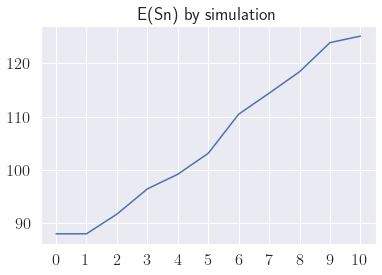

In [39]:
plt.figure();

ax = sns.lineplot(data=stock_5a);
ax.set(xticks=range(11),title="E(Sn) by simulation");

__b Simulate 6 paths__

In [40]:
from collections import defaultdict

def simu_path_5b(sigma=0.18):
     """
     input: volatility
     """

    path = defaultdict(float)
    dt = 10/1000
    t = [i*dt for i in range(1,1001)]

    r= 0.04
    

    for i in range(1,7):
        wt = Generate_wt(1000,dt)
        stock = [88]
        for j in range(1000):
            stock.append(stock[j] * (1+ 0.04*dt + sigma*wt[j]))
        path[i] = stock
        #plt.plot(stock)
        
    path = pd.DataFrame(path)
    path.index = np.arange(0,10.01,0.01)
    return path

path1 = simu_path_5b(0.18)
path1

,1,2,3,4,5,6
0.00,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
0.01,90.288194,84.119315,86.516765,86.528113,87.075080,88.900807
0.02,90.462221,84.148719,84.821886,87.361206,86.502415,88.592738
0.03,90.609354,86.588622,83.590036,86.797173,85.234439,90.873785
0.04,91.119823,87.295936,84.924058,86.295385,84.557371,90.661176
...,...,...,...,...,...,...
9.96,290.250716,47.353000,215.954175,106.273091,55.737882,125.020045
9.97,290.749628,46.255435,217.650623,107.201532,53.570029,122.552263
9.98,289.185275,46.645105,211.586421,105.845460,52.137445,124.184838
9.99,284.309352,47.394856,212.470917,107.142569,52.806945,128.249532


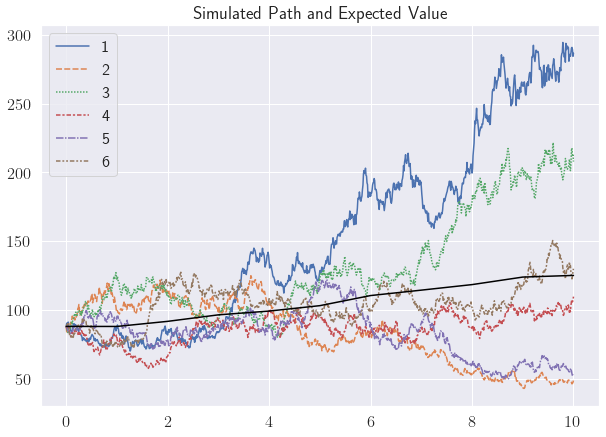

In [41]:
plt.figure(figsize=(10,7))

ax1= sns.lineplot(data=path1)
ax1.set(title='Simulated Path and Expected Value')
plt.plot(stock_5a,color='black')

In [42]:
stock_5_2 = [88]

for i in range(10):
    stock_5_2.append(path_simulation(88,0.04,sigma=0.35,t=i)[1])

path2 = simu_path_5b(0.35)

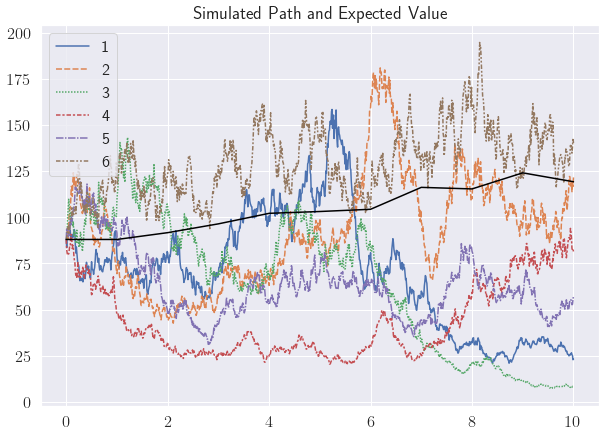

In [43]:
plt.figure(figsize=(10,7))

ax1= sns.lineplot(data=path2)
ax1.set(title='Simulated Path and Expected Value')
plt.plot(stock_5_2,color='black')

Text(0.5, 1.0, 'Expected Value')

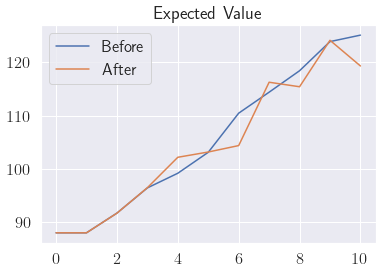

In [44]:
# # expected value before and after
plt.plot(stock_5a)
plt.plot(stock_5_2)
plt.legend(['Before','After'])
plt.title('Expected Value')

## 6

__a. Euler Discretization__

$\frac{dy}{dx} = f(y,t), \ and \ y(0) = y_0$, we can divide $[0,T]$ to $N$ equal parts so that $\tau = \frac{T}{N}$ as step.

For this equation, we have :  $ 4\[ \int_{0}^{1} \sqrt{1-x^2} \,dx \] $ and for simplicity we let y = $4\sqrt{1-x^2}$


According to the formula $y_t = y_o \ + \[ \int_{t_0}^{t} \ f(y_{\tau},\tau)d_\tau\]$, we can know 

$y_{t_1} = y_o \ + \[ \int_{t_0}^{t_1} \ f(y_{\tau},\tau)d_\tau\]$

$y_{t_1} \approx y_1 = y_0 + f(y_0,t_0)\tau$

$y_{n+1} = y_n + f(y_n,t_n)\tau , \ n=0,1,2 ···· N-1$

In [45]:
# Implementation of Euler Discretization
N = 1000
T = 1
tau = T/N
dt = np.arange(0,1,T/N).tolist()
euler = [0]

for i in range(1,N+1):
    euler.append(euler[i-1]+ 4*np.sqrt(1-dt[i-1]**2)*tau)

approx_value = euler[-1]
print(f'Estimate value by using the Euler’s discretization scheme is: {approx_value}.')

Estimate value by using the Euler’s discretization scheme is: 3.143555466911028.


__b. Estimate the integral by Monte Carlo simulation.__

In [36]:
# Estimate the integral by Monte Carlo simulation.
u = LGM(6,1000)
integgral_mc = [np.sqrt(1-u[i]**2)*4 for i in range(len(u))]
value_mc = np.mean(integgral_mc)
var_mc = np.var(integgral_mc)

print(f'Estimate value by using the Monte Carlo simulation is: {value_mc}.')

Estimate value by using the Monte Carlo simulation is: 3.1355512852508935.


__c. Importance Sampling Method__

$\theta = 4 \[ \int_{0}^{1} \sqrt{1-x^2} \,dx \] = \pi $

$= E\left[4\sqrt{1-u^2}\right]$

    

Let $x = U$, $ \ g(x) = 4\sqrt{1-x^2}$


$t(·) = \left\{
    \begin{array}\\
        \frac{1-ax^2}{1-\frac{a}{3}} & \mbox{for } \ [0,1] \\
        0 & \ else
    \end{array}
\right.$ 

$E_{t(·)}\left[ \frac{4\sqrt{1-y^2}}{t(y)}\right] \approx \frac{1}{N}\sum_{i=1}^{N} \frac{4\sqrt{1-y^2}}{t(y)}$


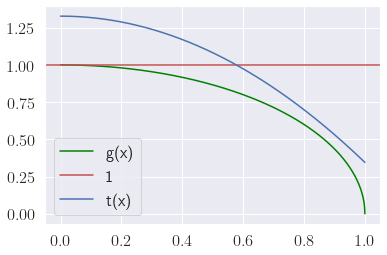

In [14]:
# visualize
def f(x):
    return( np.sqrt(1-x**2) )

xl = np.linspace(0,1,1000)
yl = f(xl)

plt.plot(xl,yl,color='green')

# we may use the uniform distribution U[0,1] as the optimal weight function g(x)
plt.axhline(y=1, color='r')

# choose a = 0.74 as suggested by the notes
tx = (1-0.74*xl**2) / (1-0.74/3)
plt.plot(xl,tx)
plt.legend(['g(x)','1','t(x)'])
plt.show()

In [37]:
alpha = np.arange(0,1.01,0.01)
variance = defaultdict(float)
for a in alpha:
    var = [4*np.sqrt(1-i**2)/((1-a*i**2)/(1-a/3)) for i in u]
    variance[a] = np.var(var)

In [38]:
min_alpha = min(variance,key=variance.get)
min_alpha = 0.74 
min_alpha

0.74

In [63]:
def accept_reject(n):
    """
    n: generate N outputs
    Accept Rejection Mehod
    """
    
    generate = []
    
    i = 0
    
    reach_num = False
    
    while i<n and not False:
        u = np.random.uniform(0, 1)
        x = (1-min_alpha*u**2)/(1-min_alpha/3)
        
        if x<=1 and x>=0:
            generate.append(x)
            i+=1
        else:
            continue
        
        if i ==n:
            reach_num =True
            
    return generate

In [64]:
sample_rv = accept_reject(10000)

new_estimate = [4*np.sqrt(1-y**2)/((1-min_alpha*y**2)/(1-min_alpha/3)) for y in sample_rv]
new_val = np.mean(new_estimate)
new_var = np.var(new_estimate)
print(f'Estimate value by with importance sampling is: {new_val}.')

Estimate value by with importance sampling is: 3.149794491445853.


In [65]:
d= {'Expected Value':[value_mc,new_val],'Variance':[var_mc,new_var]}
result = pd.DataFrame(d)
result.index=['Before Importance Sampling','After Importance Sampling']
result.columns = ['Expected Value','Variance']
result

,Expected Value,Variance
Before Importance Sampling,3.135551,0.856790
After Importance Sampling,3.149794,0.191652
